In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

# NN Regresyon

In [8]:
import pandas as pd
data1= pd.read_excel("HW_Data_Set.xlsx")
data = data1.copy()
data = data.replace('?',np.nan)
data = data.dropna()
dummy = pd.get_dummies(data[["ind_109"]])
y = data["90_target"]
X_= data.drop(["ind_109","50_target","90_target","20_target", "ind_420", "ind_422"],axis=1).astype('float64')
X = pd.concat([X_,dummy[["ind_109_GREEN"]]],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Standartlaştırma işlemi gerçekleştirildi.

In [17]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [18]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [19]:
mlp_model.n_layers_

4

In [20]:
mlp_model.hidden_layer_sizes

(100, 20)

In [21]:
y_pred = mlp_model.predict(X_test_scaled)

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

21.392414704535284

# Tuning

In [23]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [24]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [25]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [26]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activat

In [27]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}

In [32]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (300,200,150))

In [33]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [34]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

20.038605190382803

# CART REGRESYON

In [36]:
#Heterojen veri setleri belirlenen bir hedef degişkene göre homojen gruplara ayrılır.
#Amaç veri setindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.

In [37]:
import pandas as pd
data1= pd.read_excel("HW_Data_Set.xlsx")
data = data1.copy()
data = data.replace('?',np.nan)
data = data.dropna()
dummy = pd.get_dummies(data[["ind_109"]])
y = data["90_target"]
X_= data.drop(["ind_109","50_target","90_target","20_target", "ind_420", "ind_422"],axis=1).astype('float64')
X = pd.concat([X_,dummy[["ind_109_GREEN"]]],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,1


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [45]:
X_train = pd.DataFrame(X_train["ind_18"])
X_test = pd.DataFrame(X_test["ind_18"])
X_train.shape, X_test.shape

((3844, 1), (1282, 1))

In [52]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [71]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 20)

In [72]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=20,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

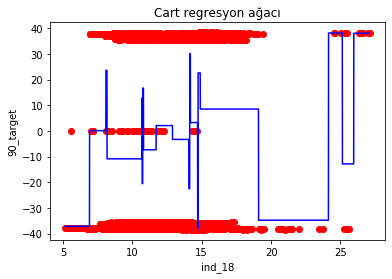

In [73]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color ="blue")
plt.title("Cart regresyon ağacı")
plt.xlabel("ind_18")
plt.ylabel("90_target")
plt.show()

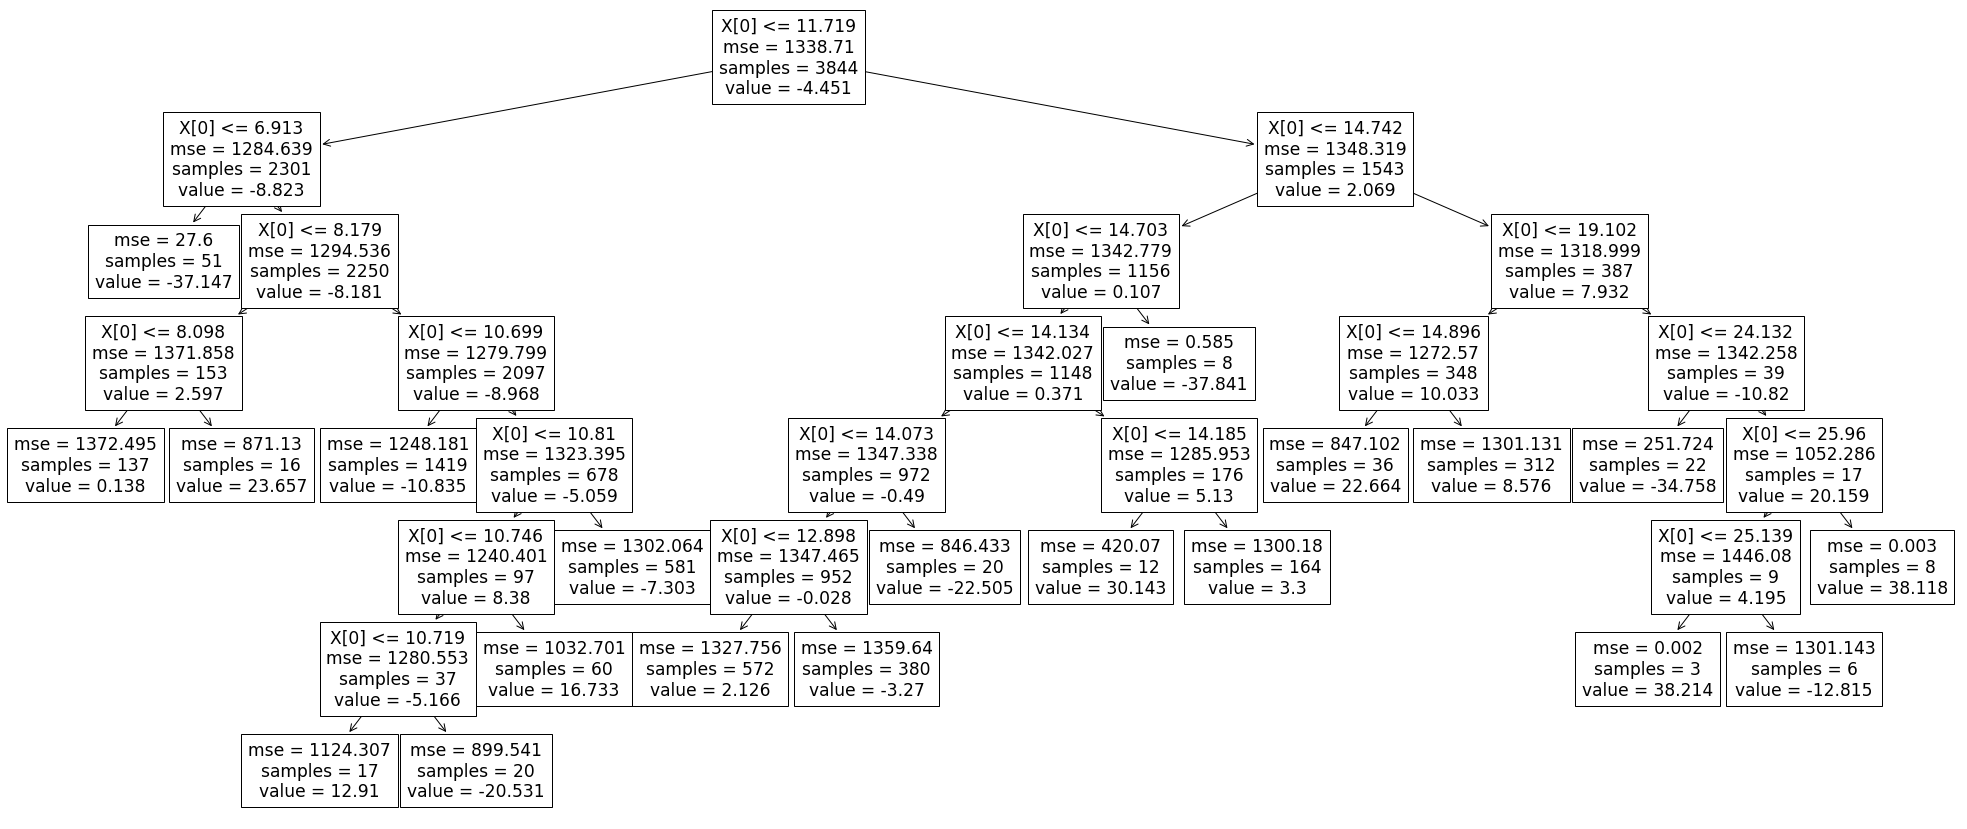

In [76]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_model);

In [77]:
from skompiler import skompile

In [78]:
print(skompile(cart_model.predict).to('python/code'))

((-37.14707703039217 if x[0] <= 6.9125001430511475 else (0.1379408632846712 if
    x[0] <= 8.097500324249268 else 23.656514871250003) if x[0] <= 
    8.178750038146973 else -10.83541428458068 if x[0] <= 10.698750019073486
     else ((12.910092458235294 if x[0] <= 10.71875 else -20.531167429) if x
    [0] <= 10.74625015258789 else 16.733481157166665) if x[0] <= 
    10.809999942779541 else -7.302703115318416) if x[0] <= 11.71875 else ((
    ((2.12596953882867 if x[0] <= 12.897500038146973 else 
    -3.2698543419473745) if x[0] <= 14.072500228881836 else -22.5051268975) if
    x[0] <= 14.133749961853027 else 30.143496249166663 if x[0] <= 
    14.184999942779541 else 3.2997584111585354) if x[0] <= 
    14.702500343322754 else -37.84094779125) if x[0] <= 14.742499828338623 else
    (22.663654583888896 if x[0] <= 14.896250247955322 else 
    8.575664074358968) if x[0] <= 19.102499961853027 else 
    -34.758054414545455 if x[0] <= 24.13249969482422 else (
    38.21367307666667 if x[0] <= 25.

In [79]:
x = [91]

In [80]:
((-37.14707703039217 if x[0] <= 6.9125001430511475 else (0.1379408632846712 if
    x[0] <= 8.097500324249268 else 23.656514871250003) if x[0] <= 
    8.178750038146973 else -10.83541428458068 if x[0] <= 10.698750019073486
     else ((12.910092458235294 if x[0] <= 10.71875 else -20.531167429) if x
    [0] <= 10.74625015258789 else 16.733481157166665) if x[0] <= 
    10.809999942779541 else -7.302703115318416) if x[0] <= 11.71875 else ((
    ((2.12596953882867 if x[0] <= 12.897500038146973 else 
    -3.2698543419473745) if x[0] <= 14.072500228881836 else -22.5051268975) if
    x[0] <= 14.133749961853027 else 30.143496249166663 if x[0] <= 
    14.184999942779541 else 3.2997584111585354) if x[0] <= 
    14.702500343322754 else -37.84094779125) if x[0] <= 14.742499828338623 else
    (22.663654583888896 if x[0] <= 14.896250247955322 else 
    8.575664074358968) if x[0] <= 19.102499961853027 else 
    -34.758054414545455 if x[0] <= 24.13249969482422 else (
    38.21367307666667 if x[0] <= 25.138750076293945 else 
    -12.815017498333333) if x[0] <= 25.960000038146973 else 38.118464753750004)

38.118464753750004

In [81]:
cart_model.predict(X_test)[0:5]

array([-3.26985434, -3.26985434, -7.30270312, -7.30270312,  8.57566407])

In [82]:
cart_model.predict([[91]])

array([38.11846475])

In [83]:
y_pred =cart_model.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

36.23749502198169

# Tuning

In [85]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred))

46.13857600588036

In [87]:
cart_params = {"min_samples_split": range(2,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,10)}

In [88]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10, n_jobs=-1, verbose=2)

In [89]:
cart_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 4654 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 8542 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed:   37.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': range(4, 10),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_sp

In [90]:
cart_cv_model.best_params_

{'max_leaf_nodes': 8, 'min_samples_leaf': 15, 'min_samples_split': 2}

In [92]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=8, 
                                   min_samples_leaf=15, 
                                   min_samples_split=2)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)

In [93]:
np.sqrt(mean_squared_error(y_test, y_pred))

36.35944908476429

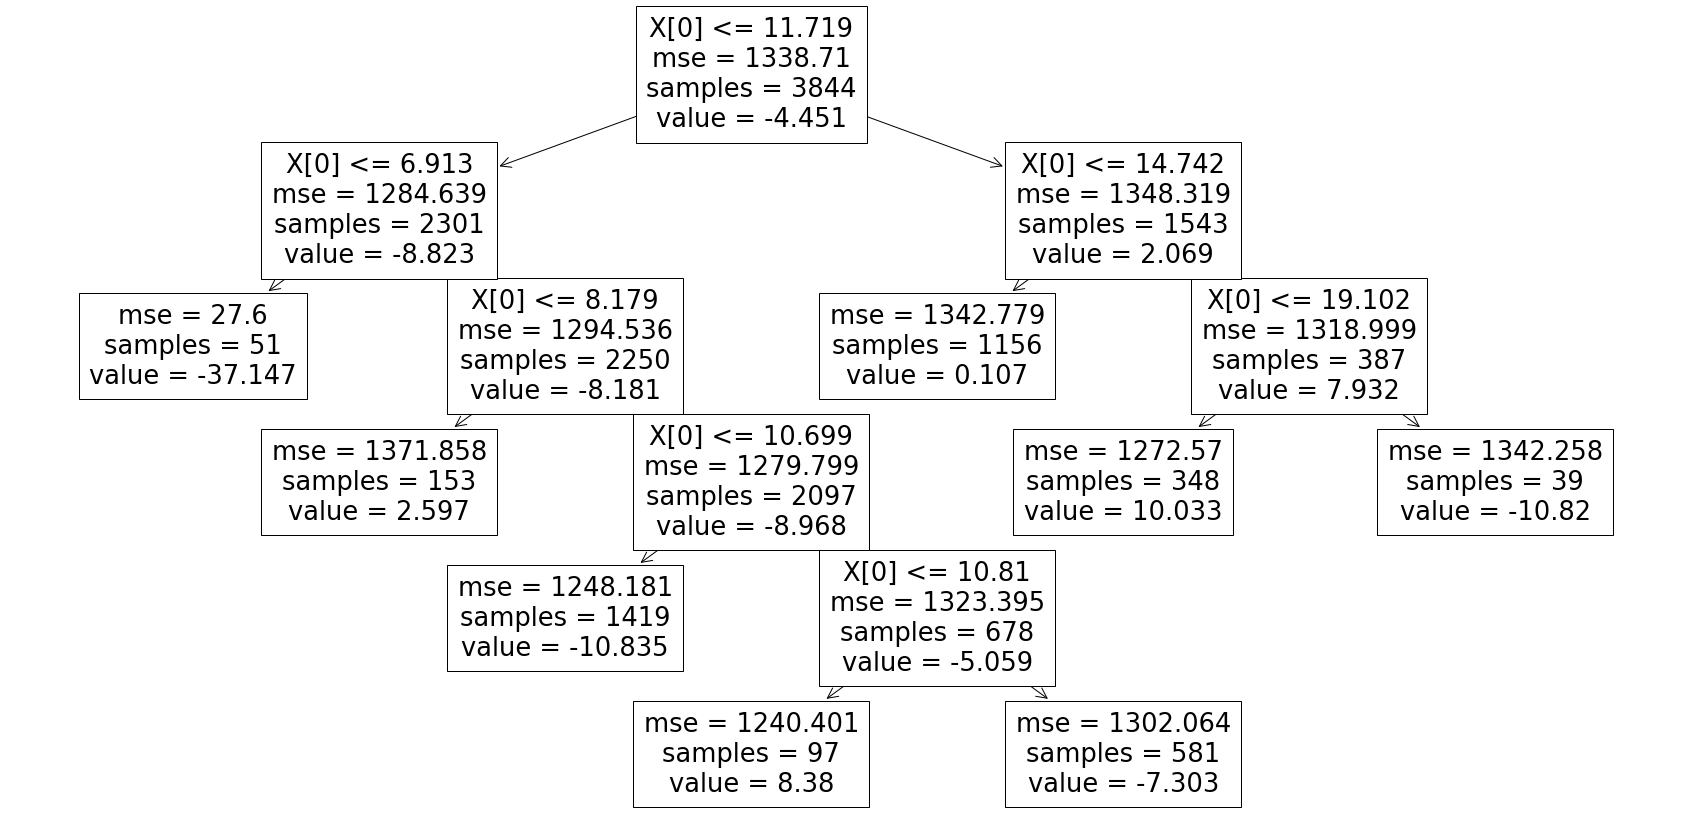

In [94]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

# RandomForest Regresyon

In [95]:
import pandas as pd
data1= pd.read_excel("HW_Data_Set.xlsx")
data = data1.copy()
data = data.replace('?',np.nan)
data = data.dropna()
dummy = pd.get_dummies(data[["ind_109"]])
y = data["90_target"]
X_= data.drop(["ind_109","50_target","90_target","20_target", "ind_420", "ind_422"],axis=1).astype('float64')
X = pd.concat([X_,dummy[["ind_109_GREEN"]]],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,1


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [97]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [98]:
y_pred = rf_model.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

15.294443970585833

# Tuning

In [100]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [10, 20, 50, 100, 200]}

In [101]:
rf_model = RandomForestRegressor(random_state = 42)

In [102]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1,
                           verbose=2)
#n_jobs argümanı işlemcilerin tam performans çalışmasını saglıyor.

In [103]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 12.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [104]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 15, 'n_estimators': 200}

In [105]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 15, 
                                 n_estimators =200)

In [106]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [107]:
y_pred = rf_tuned.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test, y_pred))

21.601681408472366

In [113]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

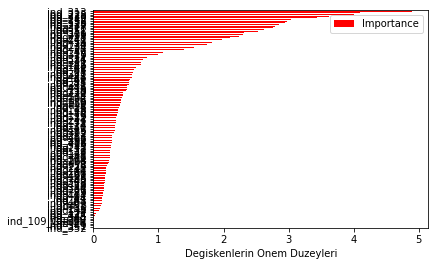

In [111]:
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Degiskenlerin Onem Duzeyleri")
plt.show()